# Task 1 - Conjugate vs. Jeffreys prior

## Outline
1. Introduction to Bayesian Statistics
- Overview of Bayesian and the importance of priors in Bayesian statistics
2. Conjugate Priors
- Definition and examples
- Advantages
- Limitations
3. Jeffreys Priors
- Definition
- Advantages
- Limitations
4. Comparison
- Computational ease
- Outcomes of posterior distribution -> interpretability
- Differences in application scenarios -> when to prefer which
5. Real world scenario
- Hypothetical scenario (medicine) definition
- Illustrations and description of calculating each prior in this scenario
- Discussion of practical consequences of choosing each prior in this scenario
6. Conclusion
- Key points
- Importance of careful prior selection

## Sources

1. EE527:Introduction to Bayesian Inference
https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=fbbd7f280d2dc1e536857212674423b52d8879d1
2. On conjugate families and Jeffreys priors for Mises-Fisher distributions
https://www.sciencedirect.com/science/article/pii/S0378375812003448
3. On the impact of the choice of the prior in Bayesian statistics
file:///Users/stahlma/Downloads/On%20the%20Impact%20of%20the%20Choice%20of%20the%20Prior%20in%20Bayesian%20Statistics%20_%20IntechOpen.pdf
4. Conjugate Priors Represent Strong Pre-Experimental Assumptios
https://people.eecs.berkeley.edu/~jordan/sail/readings/gutierrez-pena-muliere.pdf

## Example

### Secnario
Development of a diagnostic tool that uses patient data to predict the possibility of Type 2 diabetes. The tool uses Bayesian inference to update the probability based on patient characteristics such as age, BMI and blood sugar levels. 

### Steps
1. Define the priors
- Conjugate Prior: 
We assume a beta distribution for the prior probability of diabetes, given its conjugacy with the binomial likelihood of diabetes occurence. 
- Jeffreys Prior: 
We'll use it to asses how non-informative priors influence the posterior in the absence of strong initial beliefs
2. Likelihood:
- We'll consider a simple likelihood function based on the binomial distribution, reflecting the number of positive cases in a sample of patients tested
3. Comput Posterior:
- Calculation and comparison of the posterior distributions derived from the conjugate and Jeffreys priors to show how each impacts the updated disease probability after observing new data. 

In [77]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, binom

In [78]:
# Sample data
n_patients = 100 # Number of patients tested
n_positive = 15 # Number of patients testing positive

In [79]:
# Define parameters for the prior beta distribution (Conjugate Prior)
alpha_prior = 2
beta_prior = 2

# Update the prior with the data
alpha_posterior_conj = alpha_prior + n_positive
beta_posterior_conj = beta_prior + n_patients - n_positive

In [80]:
# Define Jeffreys prior for a binomial distribution (Beta(0.5, 0.5))
alpha_prior_jeff = 0.5
beta_prior_jeff = 0.5

# Update the Jeffreys prior with the data
alpha_posterior_jeff = alpha_prior_jeff + n_positive
beta_posterior_jeff = beta_prior_jeff + n_patients - n_positive

In [81]:
# Calculate the posterior distributions
x = np.linspace(0, 1, 1000)
posterior_conj = beta.pdf(x, alpha_posterior_conj, beta_posterior_conj)
posterior_jeff = beta.pdf(x, alpha_posterior_jeff, beta_posterior_jeff)

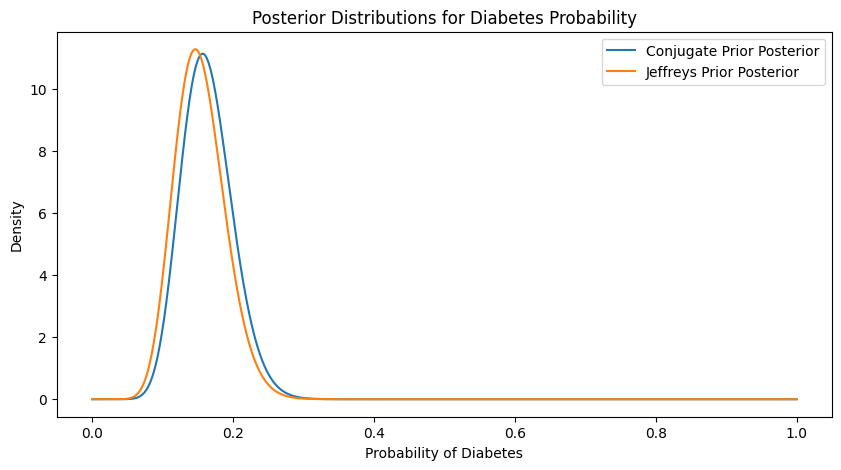

In [82]:
# Plot the results
plt.figure(figsize=(10, 5)) 
plt.plot(x, posterior_conj, label='Conjugate Prior Posterior')
plt.plot(x, posterior_jeff, label='Jeffreys Prior Posterior')
plt.title('Posterior Distributions for Diabetes Probability')
plt.xlabel('Probability of Diabetes')
plt.ylabel('Density')
plt.legend()
plt.show()

## Results
We can see that both priors calculate almost the same result. The Jeffreys prior is just a little more skewed to the left than the Conjugate prior, and a tiny bit more narrow. This meas, if we use a Conjugate prior in this example, with alpha and beta set to 2, we will predict a diabetes disease a little more than a non-informative Jeffreys prior. 

However, we chose a fairly uniform alpha and beta by setting both to 2. If we were to alter alpha and beta a bit we would get different results. Changing alpha and beta would mean, to include more prior information into the model we might have because we have expert knowledge on the topic, or we have preciously collected data on the topic and can make a good estimation. 

We have also used a fairly small dataset of just 200 datapoints. We would expect the two posterior distributions to behave a bit differently for much smaller or larger datasets.

## Showcasing different alpha and beta conjugate prior values in the context of differntly sized datasets
alpha = 2, 5, 1, 10
beta =  2, 1, 5, 10
datasize = 10, 50, 100, 500, 1000, 5000

To make the examples comparable we will stay with the assumptions made above -> 15% of patients test positive

In [83]:
alpha_values = [2, 5 ]
beta_values = [2, 1]
datasizes = [10, 500]

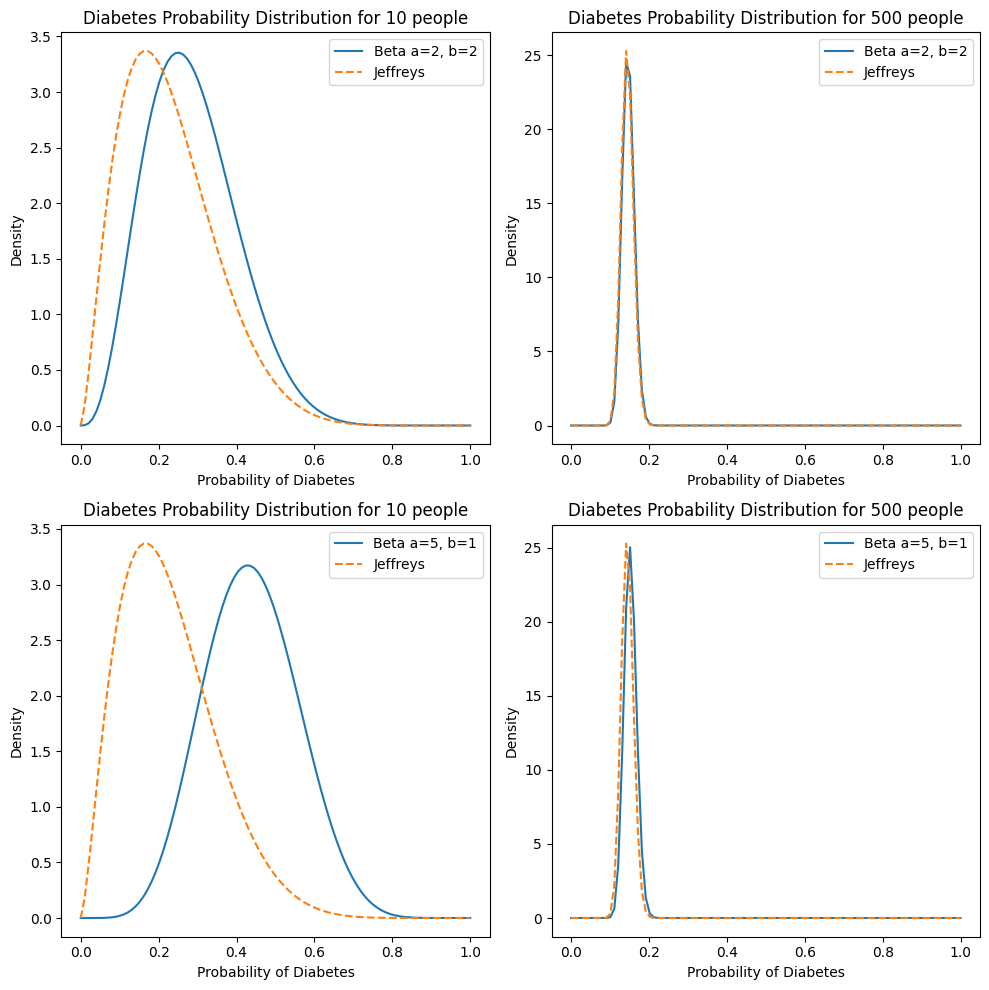

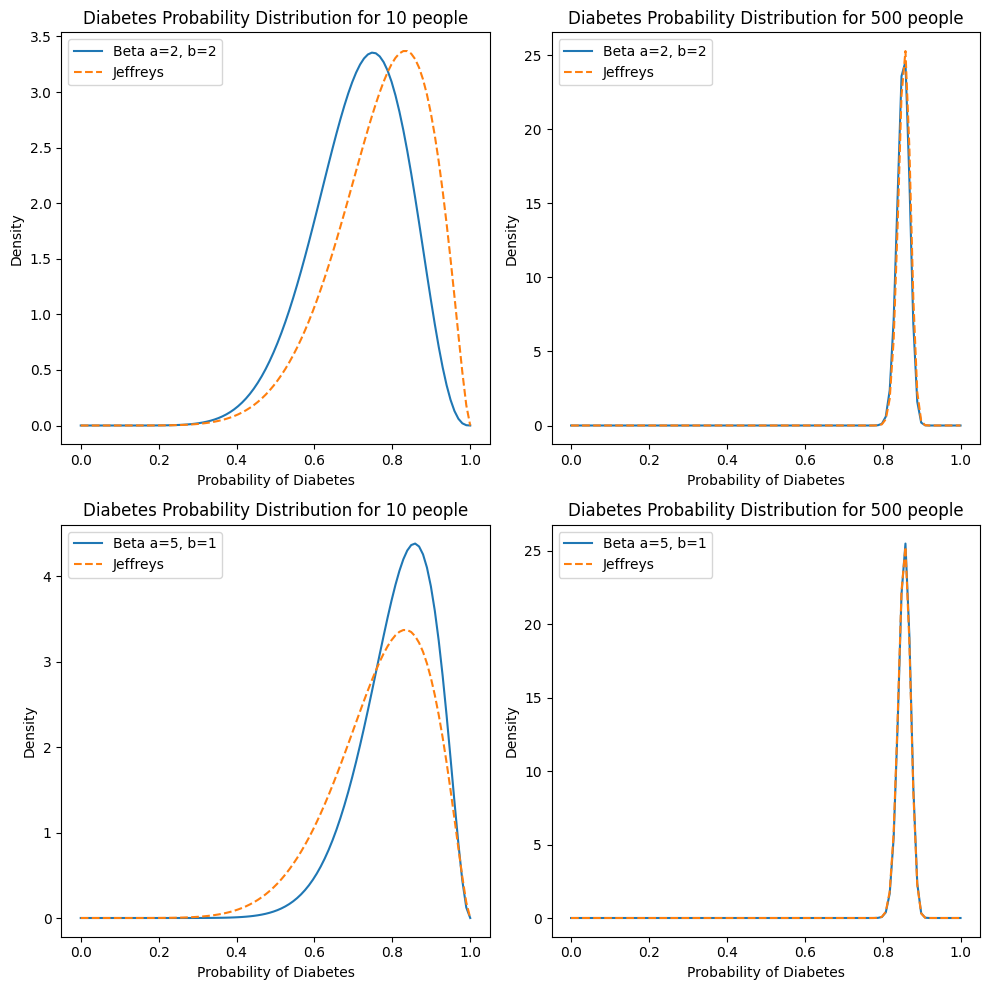

In [84]:
def plot_posteriors(alpha_values, beta_values, datasizes, probability=0.15):
    num_rows = len(alpha_values)
    num_cols = len(datasizes)
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 5*num_rows))
                           
    for i, (alpha_input, beta_input) in enumerate(zip(alpha_values, beta_values)):
        for j, n in enumerate(datasizes):
            np.random.seed(73)
            data = binom.rvs(n=n, p=probability, size=1)
            alpha_post = alpha_input + data
            beta_post = beta_input + n - data
            alpha_post_jeffreys = 0.5 + data
            beta_post_jeffreys = 0.5 + n - data

            x = np.linspace(0, 1, 100)
            posterior = beta.pdf(x, alpha_post, beta_post)
            posterior_jeffreys = beta.pdf(x, alpha_post_jeffreys, beta_post_jeffreys)

            if num_rows == 1 or num_cols == 1:
                ax = axs[max(i,j)]
            else:
                ax = axs[i, j]
          
            ax.plot(x, posterior, label=f'Beta a={alpha_input}, b={beta_input}')
            ax.plot(x, posterior_jeffreys, label=f'Jeffreys', linestyle='--')
            ax.set_title(f'Diabetes Probability Distribution for {n} people')
            ax.set_xlabel('Probability of Diabetes')
            ax.set_ylabel('Density')
            ax.legend()
    plt.tight_layout()
    plt.show()

plot_posteriors(alpha_values, beta_values, datasizes)
plot_posteriors(alpha_values, beta_values, datasizes, probability=0.85)

## Results part 2
We can observe that the prior plays a major role when the data is scarce. In very small datasets we have a wide margin of probabilitys by each of the calculated posterior distributions. As we expected the posterior distributions are always the same if we use the Jeffreys prior, and only look at datasets of the same size. The conjugate prior however hinges on the selection of alpha and beta values, a relatively larger alpha moves the distributions peak to the right, while a relatively larger beta moves it to the left. Interestingly we can also observe that if alpha and beta are the same but of a larger value (10 instead of 2) the distributions peak will also be moved further towards the center. 
In general we can take from the data above that the larger the dataset gets the less important the prior gets (let the data speak for itself). No matter the alpha and beta priors for the conjuagte, if the dataset is sufficiently large the jeffreys and conjugate prior calculations for the posterior distrbution will virtually render the same result. 

## Looking at a normal distribution with known variance
### Scenario
We are examining the effect of a new drug on reducing blood pressure, where the blood pressure readings follow a normal distribution. We also know the variance from earlier studies. Our goal is to estimate the mean effect of the drug. 

### Steps
1. Define Prior:
- Normal Prior for the mean
- Conjugate: We will specify different means and precisions (inverse of variance)
- Jeffreys: Proprer non informative prior with large variance
2. Likelihood:
- Normal likelihood
3. Posterior calculation

In [85]:
from scipy.stats import norm

# Define known variance of blood pressure readings
known_variance = 25 # We know that the variance is 5 squared (just an example)

# Define the true mean effect of the drug (only for simulation purposes)
true_mean_effect = -10

# Simulate the blood pressure readings
np.random.seed(73)
sample_sizes = [10, 100, 500]
sample_data = {n: np.random.normal(true_mean_effect, np.sqrt(known_variance), n) for n in sample_sizes}

In [86]:
# Define prior mean and precision for conjugate normal prior
prior_means = [0, -9, -20]
prior_precisions = [0.1, 0.5, 0.8] # Larger precision means more confidence in the prior

# Define a large variance for the non-informative prior to simulate Jeffreys prior
non_informative_variance = 1e6

In [87]:
def calculate_normal_posterior(sample, prior_mean, prior_precision, known_variance):
    n = len(sample)
    sample_mean = np.mean(sample)

    posterior_precision = prior_precision + n / known_variance
    posterior_mean = (prior_precision * prior_mean + n * sample_mean/ known_variance) / posterior_precision

    posterior_variance = 1 / posterior_precision

    return posterior_mean, posterior_variance

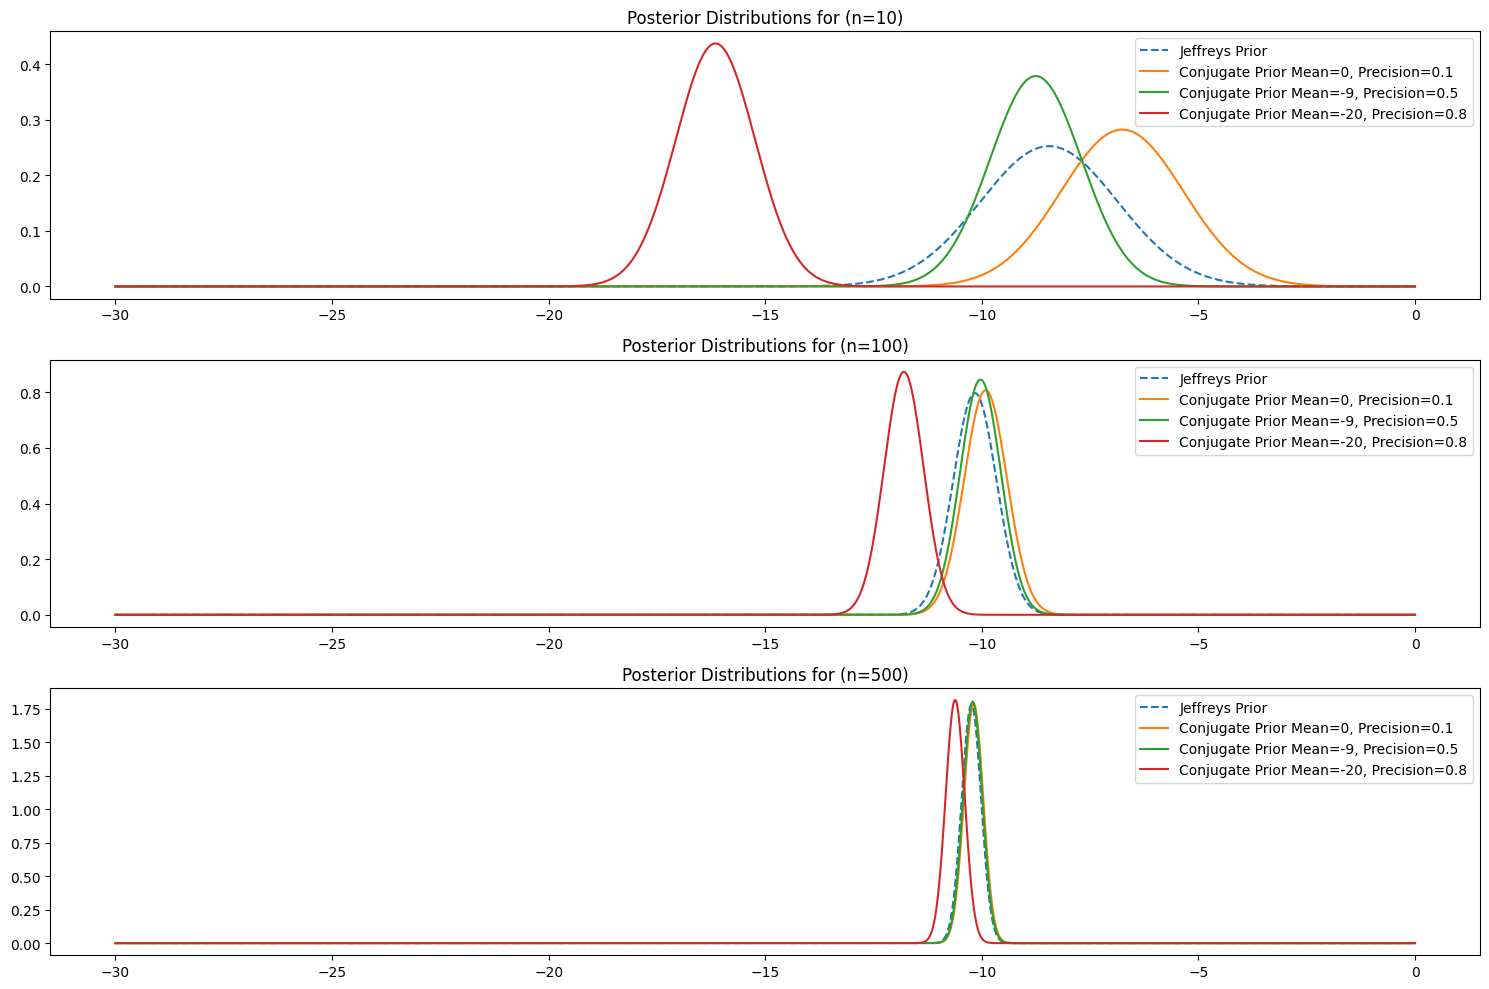

In [88]:
# Plot the results
plt.figure(figsize=(15, 10))

for i, n in enumerate(sample_sizes):
    plt.subplot(len(sample_sizes), 1 , i + 1)

    non_info_post_mean, non_info_post_variance = calculate_normal_posterior(sample_data[n], 0, 1/non_informative_variance, known_variance)

    x = np.linspace(-30, 0, 1000)
    plt.plot(x, norm.pdf(x, non_info_post_mean, np.sqrt(non_info_post_variance)), label='Jeffreys Prior', linestyle='--')

    for prior_mean, prior_precision in zip(prior_means, prior_precisions):
        post_mean, post_variance = calculate_normal_posterior(sample_data[n], prior_mean, prior_precision, known_variance)

        plt.plot(x, norm.pdf(x, post_mean, np.sqrt(post_variance)), label=f'Conjugate Prior Mean={prior_mean}, Precision={prior_precision}')
    
    plt.title(f'Posterior Distributions for (n={n})')
    plt.legend()

plt.tight_layout()
plt.show()

## Results
* High Precision Conjugate -> High confidence in the prior knowledge. If the prior knowledge (mean) is accurate and the precision is high the posterior will be more influenced by the prior and require less data to converge to the true parameter value. 
* Low Precision Conjugate -> Low confidence in prior knowledge, the data will play a larger role. 

- As the sample size increases the influence of the prior decreases
- A high precision prior converges to a precise estimate more quickly than a low precision prior, but only if the prior mean is close to the true mean
- The choice of the prior should be based on how confident we are in out prior information and its accuracy.

## Paper Sketch
### 1. Inroduction to Bayesian Statistics
- Bayesian statistics is an approach that incorporates prior knowledge through the use of a prior distribution
- The prior distribution is updated with data to obtain the posterior distribution, which reflects updated beliefs about the parameters of interest. 
### 2. Conjugate Priors
#### A. Definition and Examples
- Conjugate priors are chosen such that the prior and posterior distributions are in the same family, simplyfing the process of updating beliefs with new data
- Beta distribution to figure out whether a person has diabetes
- Normal distribution to examine drug effectiveness
- Gamma distribution for modeling the rate of hospital admissions per day, where the conjugate prior represents the expected number of admissionsand their variance based on historical data
#### B. Advantages
- Analytical tractability allows for mathematical convenience in calculating posteriors
- Ease of updating the posterior as new data arrives
- Computational efficient, which is especially adventageous if real time updates are needed
#### C. Limitations
- May not always represent realistic prior knowledge if the true distribution is significantly different from the assumed prior
- Prioritizing computational convenience might lead to the selection of a conjugate prior rhat does not fully capture the underlying complexities of the data, thus potentially compromising model fidelity
### 3. Jeffreys Priors
#### A. Definition and Examples
- Jeffreys priors are non informative priors intended to have minimal influence on the posterior distribution, embodying a state of ignorance
- The fisher information measures the amount of information that an observable random variable carries about an unkown parameter upon which the likelihood depends. Jeffrey Prior uses the square root of the detrminant of the Fisher informazion matrix to construct the prior.
- Examples: Situations where there is no clear subjective prior knowledge availabel or when an objective approach is required for inference, such as in legal or regulatory settings
#### B. Advantages
- Introduces less bias when prior knowledge is weak or non existent
- Could lead to more objective posterior distributions when prior knowledge is weak or contested
#### C. Limitations
- When there is strong prior knowledge Jeffreys prior might ignore useful information
- Less intuitive interpretations because the prior does not come from empirical data pr expert knowledge. For example a Jefferys prior might yield a posterior that does not refelct expert beliefs about a plausible range of treatment effects. 
### 4. Comparison
#### A. When to Choose a Conjugate Prior:
- Strong Prior Knowledge: When you have reliable and specific prior knowledge about the parameters, conjugate priors are beneficial because they can efficiently incorporate this information.
- Computational Simplicity: In scenarios requiring real-time updates or analyses of large datasets, the computational simplicity of conjugate priors can be crucial.
- Analytical Solutions: When the focus is on analytical solutions for educational purposes or for models that need to be understood and communicated clearly, conjugate priors are advantageous.
#### B. When to Choose a Jeffreys Prior:
- Objectivity and Neutrality: In situations where subjectivity needs to be minimized or a neutral stance is required, such as in legal or policy settings, Jeffreys prior is advantageous.
- Sparse or Limited Data: When data is limited, Jeffreys prior can prevent the influence of strong, potentially incorrect prior beliefs from dominating the results.
- Comparing Models: Jeffreys prior is ideal when comparing models with different parameterizations, as it maintains consistency across transformations.
- Baseline for New Methods: It serves as a baseline for comparing the effectiveness of new priors or methods against a non-informative approach.
- Robustness in Model Selection: It is often used in Bayesian model selection to ensure that the selection is not unduly influenced by the prior.
#### C. 
- The calculation process for conjugate priors typically involves straightforward updating of hyperparameters, which can be done analytically, leading to lower computational costs.
- Jeffreys priors might require numerical integration or approximation methods, which can be computationally intensive, especially as models become more complex.
- Tradeoffs include balancing computational efficiency against model accuracy and expressiveness. Conjugate priors offer simplicity and speed but may not capture reality as well as more complex priors. Jeffreys priors, while aiming for objectivity, may not leverage useful prior information and could be computationally expensive.
### 5. Real world scenario
- Code examples for beta (diabetes detection) and normal (medicine effectiveness)
- Practival consequences: In medical decision making, the choice of the prior can significantly impact early conclusions and treatments based on limited data. Add two real world examples where choosing the wrong prior has a negative impact and two examples where choosing the right prior has a positive impact
#### A. Negative Impact Examples:
- Inappropriate Prior in Epidemiology: In the early modeling of an epidemic, an overly confident conjugate prior suggesting a lower transmission rate could lead to underestimation of the reproduction number R0, potentially delaying public health interventions and exacerbating the spread.
- Drug Efficacy Studies: Utilizing a conjugate prior that does not align with historical data about drug efficacy could lead to incorrect conclusions about a new drug's effectiveness. This could result in premature approval or rejection of the drug, impacting patient health outcomes.
#### B.Positive Impact Examples:
- Precision Medicine: A well-informed conjugate prior based on genetic or phenotypic profiles can lead to more accurate predictions of drug responses, tailoring treatments to individual patients and improving treatment outcomes.
- Public Policy and Resource Allocation: Using a Jeffreys prior in the absence of strong pre-existing data to model the potential impacts of policy changes can lead to more neutral and data-driven decisions about resource allocation, which might be crucial during crises like natural disasters.
### 6. Conclusion
- Importance of careful prior selection
- Decisions should be made with consideration of the amount and reliability of prior knowledge and the potential impact on posterior conclusions
### 7. Recent Advancements and Ongoing Debates:
- Discussion of current research exploring new types of priors and their impact on Bayesian analysis
- Mention of computational advancments allowing for more complex models and prior selectors